In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Define the URL of the page you want to scrape
# url = 'https://www.imdb.com/title/tt0068646/reviews?ref_=tt_urv'
url = 'https://www.imdb.com/title/tt7286456/reviews?ref_=tt_urv'

# Send a request to the URL and get the HTML content of the page
response = requests.get(url)
html_content = response.content

In [3]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

In [4]:
# Find the reviews section of the page using its class name
reviews = soup.find_all('div', {'class': 'lister-item-content'})

In [5]:
# Loop through the reviews and extract the relevant information such as the review text, the rating, and the date of the review
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
corpus = []
labels = []

for review in reviews:
    review_text_elem = review.find('div', {'class': 'text'})
    rating_elem = review.find('span', {'class': 'rating-other-user-rating'})
    date_elem = review.find('span', {'class': 'review-date'})

    # Check if the elements are None before accessing their attributes
    review_text = review_text_elem.text.strip() if review_text_elem is not None else ''
    rating = rating_elem.find('span').text.strip() if rating_elem is not None else ''
    date = date_elem.text.strip() if date_elem is not None else ''

    if rating != '':
        if int(rating) >= 7:
            labels.append('positive')
        else:
            labels.append('negative')
        corpus.append(review_text)
# Preprocess the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X, labels)

# Predict the labels for the reviews
pred_labels = clf.predict(X)

# Combine the reviews and their predicted labels into a DataFrame
reviews_df = pd.DataFrame({'Review': corpus, 'Label': pred_labels})

# Save the DataFrame to a CSV file
reviews_df.to_csv('reviews1.csv', index=False)

# Print the extracted information
print('Review text:', review_text)
print('Rating:', rating)
print('Date:', date)
print('-------------------------')

Review text: I know this is an unpopular opinion, but honestly this movie is overrated and boring. 2 hours felt like 3 and a half.I don't buy the whole thing where he is invited to the show. The meta "standup" he made was extremely dull and boring. Then gets allowed to broadcast for that long without being interrupted, also being transported in the most shitty police-car ever after that, it's just not believeable enough to me.He also acted the same when he was on meds aswell as off, so that part didn't make sense either. The police must also be really not catching this guy faster after the homocide.It has some good parts but they can be boiled down to maybe 5 minutes.
Is this a movie I would watch again? Probably not.
Rating: 5
Date: 20 October 2019
-------------------------


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

corpus_train, corpus_test, labels_train, labels_test = train_test_split(corpus, labels, test_size=0.2, random_state=42)

# Preprocess the text data using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

# Train a Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, labels_train)

# Evaluate the classifier on the testing set
pred_labels_test = clf.predict(X_test)

# Calculate and print the classifier's performance metrics
accuracy = accuracy_score(labels_test, pred_labels_test)
precision = precision_score(labels_test, pred_labels_test, pos_label='positive')
recall = recall_score(labels_test, pred_labels_test, pos_label='positive')
f1 = f1_score(labels_test, pred_labels_test, pos_label='positive')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.8
Precision: 0.8
Recall: 1.0
F1 Score: 0.888888888888889


Accuracy: 0.6000, Precision: 1.0000, Recall: 0.5000, F1 Score: 0.6667


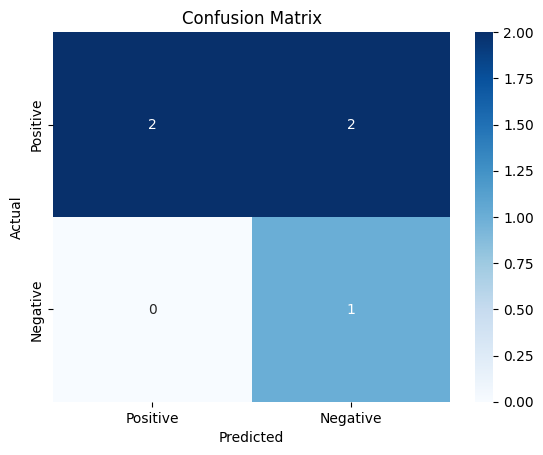

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train the classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
# import requests
# from bs4 import BeautifulSoup

# import pandas as pd

# # Define the URL of the page you want to scrape
# url = 'https://www.imdb.com/title/tt0068646/reviews?ref_=tt_urv'

# # Send a request to the URL and get the HTML content of the page
# response = requests.get(url)
# html_content = response.content

# # Parse the HTML content using BeautifulSoup
# soup = BeautifulSoup(html_content, 'html.parser')

# # Find the reviews section of the page using its class name
# reviews = soup.find_all('div', {'class': 'lister-item-content'})

# # Create a labeled dataset
# corpus = []
# labels = []
# for review in reviews:
#     review_text_elem = review.find('div', {'class': 'text'})
#     rating_elem = review.find('span', {'class': 'rating-other-user-rating'})
    
#     # Check if the elements are None before accessing their attributes
#     review_text = review_text_elem.text.strip() if review_text_elem is not None else ''
#     rating = rating_elem.find('span').text.strip() if rating_elem is not None else ''
    
#     if rating != '':
#         if int(rating) >= 7:
#             labels.append('positive')
#         else:
#             labels.append('negative')
#         corpus.append(review_text)

# # Preprocess the text data using CountVectorizer
# vectorizer = CountVectorizer(stop_words='english')
# X = vectorizer.fit_transform(corpus)

# # Train a Naive Bayes classifier
# clf = MultinomialNB()
# clf.fit(X, labels)

# # Predict the labels for the reviews
# pred_labels = clf.predict(X)

# # Combine the reviews and their predicted labels into a DataFrame
# reviews_df = pd.DataFrame({'Review': corpus, 'Label': pred_labels})

# # Save the DataFrame to a CSV file
# reviews_df.to_csv('reviews.csv', index=False)
